## As a first general note:

For a dataset containing n features, use sqrt(n) features for classifiers, n/3 features for regressions.

## As a second general note:

Remember that this is the basic setup for _any_ model:
1. Clean data (impute, drop outliers, convert temporal variables to cyclical representations).
2. One-hot encoded categorical variables (convert categorical to binary dummies)
3. Split data into features and labels (create features)
4. Converted to arrays (values.reshape(-1,1))
5. Split data into training and testing sets (via sklearn's train_test_split)

In [ ]:
# An example above - post-cleaning and post-encoding
#(Decision tree example)

clf = DecisionTreeClassifier(criterion='gini', max_depth=17, min_samples_split=10)
clf.fit(X_train, Y_train)
Y_pred_clf = clf.predict(X_train)

#Then get the confusion matrix and classification report both of which need to be imported from sklearn

#When validating on testing set, you DO NOT REFIT WITH TESTING DATA - ONLY PREDICT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Y_pred_clf_test = clf.predict(X_test)

print(classification_report(Y_test, Y_pred_clf_test, target_names=['Churn_No', 'Churn_Yes']))
print(confusion_matrix(Y_test, Y_pred_clf_test))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# 1. K Nearest Neighbors (KNN) Classifier

### How it Works

In a simple form - it guesses testing data by the distance of points of the training data, whichever is closer gets the classification.

#### Two Types
1. Nearest Neighbor = classified by the single nearest neighbor
2. K Nearest Neighbors = Euclidean measurement of the pythagorean distance of "k" number of neighbors

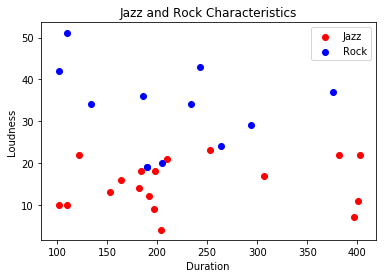

In [2]:
# example - usin NN to determine if testing data music is "jazz" or "rock"

music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
# (obviously) 1 == yes, 2 == no
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
# Doing simple Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y) # You WILL get an error if you don't first fit the training data!

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [4]:
# ^^^ loudness of 24 and duration of 190s is **not** jazz

# Now to do KNN Classifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


Based on ".predict_proba", it looks like 2 votes for rock, 3 votes for jazz (40/60 split based on n_neighbors=5). Therefore, simply because the closest observation was "rock" under nearest_neighbor, nearest_neighbor turns out to be _not_ accurate.

In [5]:
# making up some BS training data:

music_duration_test = np.array([144,233,241,235,266,400,378,134,167,199,288, 312])
music_loudness_test = np.array([14, 17, 25, 60, 44, 42, 41, 37, 29, 30, 17, 23])

# ^^ for the record, each array has ELEVEN values

In [6]:
# don't mind me, just playing around!

music_test = []
for (x, y) in zip(music_loudness_test, music_duration_test):
    music_tester = [x,y]
    music_test.append(music_tester)
    

### NOTE HERE^^^^!!!!!!!!

KNN __**ONLY**__ works if you predict a testing _instance_ and not a continuous set of data. The above (and below) loops were my way of getting around that and predicting the testing instances of _all_ my data.

In [7]:
music_test

[[14, 144],
 [17, 233],
 [25, 241],
 [60, 235],
 [44, 266],
 [42, 400],
 [41, 378],
 [37, 134],
 [29, 167],
 [30, 199],
 [17, 288],
 [23, 312]]

In [8]:
for x in music_test:
    if neighbors.predict([x]) == 1:
        print("Predicted to be JAZZ")
    else:
        print("Predicted to be ROCK")

Predicted to be JAZZ
Predicted to be ROCK
Predicted to be ROCK
Predicted to be ROCK
Predicted to be ROCK
Predicted to be JAZZ
Predicted to be JAZZ
Predicted to be ROCK
Predicted to be JAZZ
Predicted to be ROCK
Predicted to be ROCK
Predicted to be ROCK




## Identifying Classifier Probabilities based on the "MESH"

We can create a visual that shows an _area_ of what is expected to be jazz and what is expected to be rock. Below is an example..

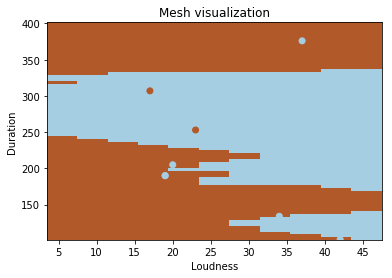

In [9]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# brown area expected to be rock, blue expected to be jazz

In [ ]:
# another mesh visualization setup
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']] # all features
y = fruits['fruit_label'] # outcome determination

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['feature1', 'feature2']].as_matrix()
    y_mat = y.as_matrix()
    
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='thing1')
    patch1 = mpatches.Patch(color='#00FF00', label='thing2')
    patch2 = mpatches.Patch(color='#0000FF', label='thing3')
    patch3 = mpatches.Patch(color='#AFAFAF', label='thing4')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
plt.xlabel('Observed Feature1')
plt.ylabel('Observed Feature2')
plt.title("X#-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    

plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

In [10]:
# Not really notes - just playing around here - ANOTHER KNN EXAMPLE!

# GOAL QUESTION: SHOULD I PLAY OUTSIDE?

#Assigning features and label variables


# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool',
      'Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No',
      'Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [11]:
# Converting the above data to numerical data for the model:
# EASY WAY TO DO THIS!
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
# By doing this, we encode "weather" to be: sunny = 2, overcast = 0, rainy = 1

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [12]:
# further encoding of the other variable "Temp"

temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

In [13]:
# Now *****THIS******** is the way to combine features - 
# literally squishing them together into a tuple!

features=list(zip(weather_encoded,temp_encoded))
features[:5]
# Damn - a lot better than my loop method...

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0)]

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted) # 1 means play

[1]


# 2. How to Normalize Distance & Pick K

### About Distances

Often, the distances of one variable are more or less important than the distance of the other variable. __Units are rarely equivalent.__

Answer: Re-scale the axes and normalize them down to 0 to 1.

### About Weighting

Likewise, not every neighbor should be weighted evenly.

Answer: Use __Z-Score__ (also known as "Standard Score"). This is the number of standard deviations away from the mean. For example, Z-Score = -2.5 means that the value is 2 and a half standard deviations below the mean.

__NOTE:__ It doesn't cause a certain "feature" to be _more_ weighted than another. Rather, based on the Z-Score, the farther the _distance_, the less weight an observation point is given.

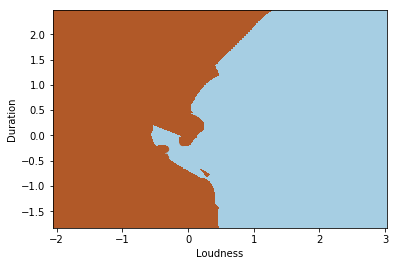

In [15]:
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

# Fit our model.
Y = music.jazz
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Choosing The Number K for the Classifier

The Larger the K - The more smoothed out the results will be

The Smaller the K - The more subtle the deviations will be, but those subtleties may be picking up pure randomness (i.e., you are overfitting data to pick up that noise)

#### So What do I do?

Answer: Play with the K-value, test it, iterate it with cross-validation folds, and overall experiment to figure out what is best.

# 3. KNN Regression Analysis

Instead of a neighbor voting for a _category_ in a classifier, it votes for a _value_ in a regression. It then averages all the votes (or a weighted average if the features are weighted) as the regression.

Example below:

In [16]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

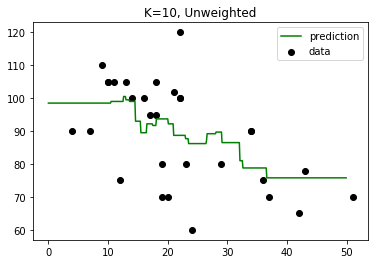

In [17]:
### GOAL HERE:::::::: Instead of classifying as "rock" or "jazz"...
# ... try to do regression to predict beats per minute (BPM).

from sklearn import neighbors

# Build our model - focusing on loudness only!!!!!

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]
# Really ^^^ just a substitute for "X_test" - the x's don't matter

# NOTE!!!!!!::: Remember to compare like objects (xtrain/ytrain and 
# xtest/ytest). If you don't, you'll get a ValueError explaining that the arrays
# are not the same size and therefore it doesn't know how to graph it.

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

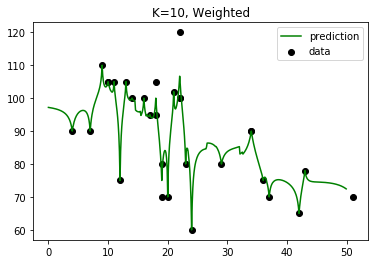

In [18]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y) # THIS IS HOW YOU DO WEIGHTED FIT!!!!!

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [19]:
# And now to cross validate

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

# Thinkful admits that these accuracies are embarrassingly low

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


# 3. Decision Trees

__The Concept:__ Each boolean question acts as a gate that brings the computer closer to the answer it predicts.

__Terminology:__
1. Node = A state/a question:
  - Root Node = First Question
  - Interior Node = Each Question thereafter
  - Leaf Node = Final state - the arrived answer
2. Rule = the question within each node
3. Branches/Paths = The links between nodes

In [20]:
# example = setting up data first 


customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

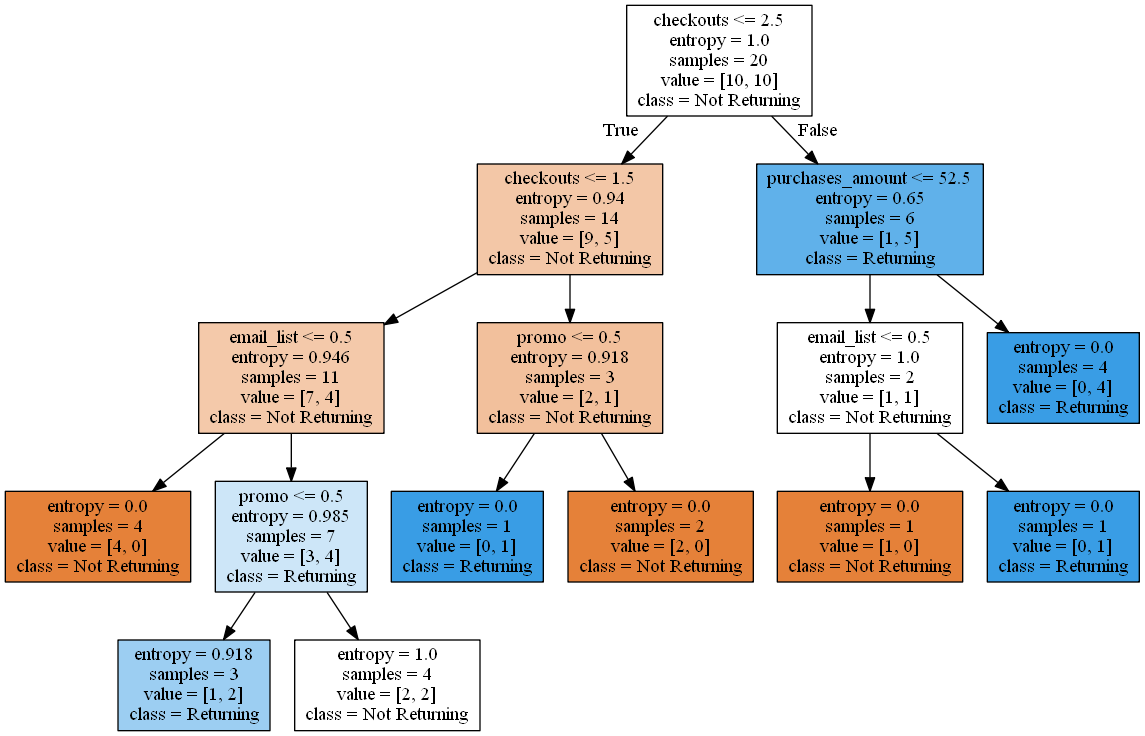

In [21]:
# ***************DECISION TREE MODEL*************

from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337 # just for example purposes - do NOT include this
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Entropy = 1 == most uncertain; 0 == most certain (best score)

#### Benefits and Downsides to Decision Trees
 - Performs an inherent feature selection and can handle various types of data
 - Prone to overfitting if you go too deep in the questioning.
 - Inherently randomizes the data, so it doesn't build the same way every time.

## So How do Decision Trees Work?

The algorithm runs down every feature until it finds a pure class or has met a terminating condition.

__Requirements:__
 - Outcomes have to be binary.
 - Attributes that are measured to make decisions must be "known and countable."

# 3. Random Forest

Downsides to Decision Trees are the high variance and propensity to overfit.

By creating _more_ nodes, with each tree/node getting a "vote" on the outcome, the chances for overfitting significantly decreases.  This is the idea of __random forests__ - in my personal opinion, it's a cross validation series of folds of decision trees. 

Such models can apply to classification or regression problems. Classifier - most popular outcome (the mode) is found. For regressions - the average (mean) is returned.

__Advantages:__
 - Reasonably accurate and strong performer.
 - Require little input preparation - can handle both categorical data (with one-hot encoding from sklearn) and numerical data.
 - Performs an implicit feature selection.
 - Quick to train.

__Disadvantages:__
 - Only works within a sample - cannot predict data outside of its training range.
 - No visual output - you're unable to show how the model "got there", i.e., arrived at the result that it did.

# 4. Ensemble Modeling

__Definition:__ a model made up of other models. A "Random Forest" is essentially an example of an ensemble model of many decision trees, being combined to do a random forest vote.

__How to do Ensemble Modeling:__
1. _Bagging_: use a model for each subset of data, then taking the majority of the outcome or the mean of the outcomes. Random Forest is a bagging ensemble model.

2. _Boosting_: Using models serially - the output of one model is the input of another model.

3. _Stacking_: A hybrid of the above - training models in parallel and using all of those outputs as inputs for a final model.

# 5. Example of Random Forest

In [32]:
# dataset being used - 2015 Loan Data for Company "Lending Club"
# This csv file is 326 MB!!!! Guaranteed to crash :)

dfrf = pd.read_csv(
    r'C:/Users/jafon/Documents/PythonMaterials/Data/LoanStats3d/LoanStats3d1.csv',
    skipinitialspace=True,
    header=1,
)
dfrf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [35]:
type(dfrf.int_rate[5])

str

In [36]:
# First step is to convert the "grades" in the dataset to numerical values for
# sklearn to make sense of it (sklearn can't work with strings)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [37]:
X = dfrf.drop('loan_status', 1)
Y = dfrf['loan_status']
rfc = ensemble.RandomForestClassifier()

In [39]:
# for the above, if we wanted to convert X to numerical values via
# X = pd.getdummies(X), we would have crashed the kernel...

######## WHAT IS PD.GETDUMMIES(data)?!?!?!
######## ANSWER: Converts categorical variables into numeric ('dummy') indicators

# ...so, y'know, don't do that. Be a little more nuanced instead of doing
# the whole thing at once, like as follows:
categorical = dfrf.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique()) # shows number of unique values (for each column)

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [40]:
# a lot of unique values to convert - drop the columns with too many unique values

dfrf.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# Work with the columns you **do** want.
dfrf['id'] = pd.to_numeric(dfrf['id'], errors='coerce')
dfrf['int_rate'] = pd.to_numeric(dfrf['int_rate'].str.strip('%'), errors='coerce')



In [41]:
# remove the final two rows
dfrf = dfrf[:-2]

In [44]:
dfrf.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421090,36371250.0,39102635.0,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,8 years,...,0.0,1.0,100.0,100.0,0.0,0.0,32950.0,25274.0,9200.0,15850.0
421091,36441262.0,39152692.0,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,10+ years,...,0.0,2.0,56.5,100.0,0.0,0.0,152650.0,8621.0,9000.0,0.0
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0


In [43]:
# Now by dropping all of that, we can **safely** convert to numeric
pd.get_dummies(dfrf)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
# now with cleaned data - can run cross val score with random forest
# Note1: we are dropping NaN columns because dataset is so large, so we don't need them
# Note2: Running this cell may take a few minutes. Be wary!

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

# ensemble.RandomForestClassifier(n_estimators = 10) is default setting

X = dfrf.drop('loan_status', 1) 
### features are everything BUT loan_status, which is dropped axis=1

Y = dfrf['loan_status'] # using loan status solely as target variable, y
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

array([0.9801477 , 0.9805514 , 0.98164375, 0.98164375, 0.96950843,
       0.9729043 , 0.94317129, 0.98047923, 0.97974209, 0.98069159])

In [54]:
rfc.decision_path(X)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [47]:
# THE ABOVE SHOULD WORK FOR THE RECORD!

# Graphing a single tree from a random forest

from sklearn.datasets import load_iris # sample dataset package
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

0                    Current
1                    Current
2                 Fully Paid
3                    Current
4                 Fully Paid
5                    Current
6                    Current
7                 Fully Paid
8                    Current
9                 Fully Paid
10                   Current
11                   Current
12                   Current
13                   Current
14                Fully Paid
15                   Current
16                   Current
17                   Current
18                   Current
19                   Current
20                   Current
21                Fully Paid
22                   Current
23                   Current
24                   Current
25                   Current
26                   Current
27                Fully Paid
28                   Current
29                   Current
                 ...        
421065               Current
421066               Current
421067               Current
421068        

# 3. Advanced Regression

## Logistic Regression

Regression from -1 to 1 (really from 0 to 1) for purposes of estimating probability. Stated another way, it's doing a _regression_ of a categorical number of outcomes (e.g., regression of probability of flipping an unfair coin).
 - Doing a regular regression on this would have two clustered lines of probabilities, and the regression line will try to connect them like trying to connect two split bowling pins.
 - By converting the binary values into the "odds" of getting y=1 for each value of x, we now get a continuous regression. This __is what a logistic regression is.__

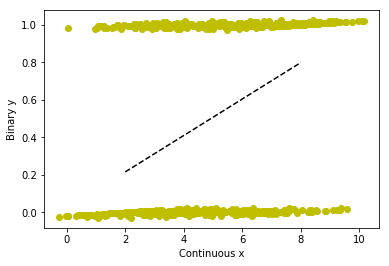

In [56]:
# EXAMPLE!

# Set the random seed so that the 'random' data is the same each time
# the code is run.
np.random.seed(seed=456613)

# Create some data.
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        'x': probs
    }) 
    df = df.append(tmp)

# Continuous predictor.
x = df['x']

# Binary outcome.
bin_y = df['y']

# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,bin_y,1)

# Work as a function to return the predicted value of y.
fit_fn = np.poly1d(fit)

# Add a little 'noise' to the data for graphing purposes.
jitter = np.random.randn(700)

# Display our results.
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()


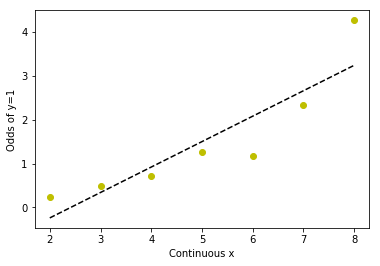

In [57]:
# This is the "split bowling pin" problem I mentioned.
# Fix it to get something more continuous. 

# Find the unique values of x
xvals = x.unique()

# Calculate and store the odds.
yodds = []

for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(bin_y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

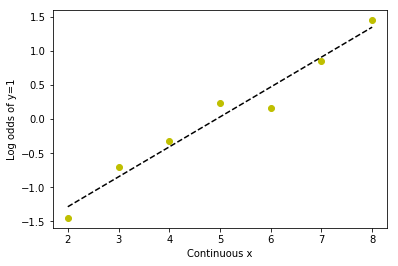

In [58]:
# transform it to log for more linearity
# Natural log of the odds.
ln_yodds = np.log(yodds)

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)

# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

## Ridge Regression

For Ordinary Least Squares, the distance squared is the "penalty" calculated in for purposes of determining the regression.

__Ridge Regression (or "L2 Regularization")__ modifies that penalty to focus on the coefficients of the individual features (the slopes). As the scalar of the penalty "lambda" gets larger, the penalty for the coefficient size gets larger. __IN OTHER WORDS:__ for features that are ___super sensitive___ (i.e., small increases in Xyield large Y differences), ridge regression adds bias to "desensitize" this and thus prevents overfitting.

The Core Principle: __As models become increasingly complex and features begin to correlate with _one another_, coefficients become increasingly large. Increasingly large coefficients are a sign of overfitting, and we don't want that. Ridge regression is good if you have MANY CORRELATED PARAMETERS!__

Even better Core Principle: __USE RIDGE REGRESSION FOR VERY SMALL DATASETS, AS THE POINTS IN SMALL DATASETS ARE VERY SENSITIVE AND THUS CREATE LARGE VARIANCE.

In [ ]:
#alpha = regularization scalar "lambda" 
# (not called lambda cuz you shouldn't call a list "list")

#fit_intercept=False because intercept is not regularized and thus would
# screw up the standardized data if kept - so we drop it.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 

ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

# alpha=10 here. It can be any value > 0. 
# Play around with it through cross-validation to see what the best value should be

## LASSO Regression

LASSO = Least Absolute Shrinkage and Selection Operator, or "L1 Regulatization".

Lasso penalizes the sum of the absolute values of the coefficients.

Instead of the typical Gradient Descent Algorithm, Lasso works by excluding a single feature, running the model, and if the model is good enough without that feature (as determined by the value of lambda), the coefficient of the excluded feature is set to zero (i.e., excluding it from the model). Otherwise, the coefficient is re-computed, and a new iteration of the model begins with this new coefficient. This continues for all other features until the "shrinkage" of the coefficients is less than a pre-determined threshold.

__The Core Principle:__ Lasso is an efficient method of __feature selection__ when dealing with an exceptionally large number of features.

In [ ]:
# Lasso example

lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

## So when to use Ridge (L2) vs. Lasso (L1)?

This is taken directly from some people smarter than I am.

#### How to decide which regularization (L1 or L2) to use?

Is there collinearity among some features? L2 regularization can improve prediction quality in this case, as implied by its alternative name, "ridge regression." However, __it is true in general that either form of regularization will improve out-of-sample prediction__, whether or not there is multicollinearity and whether or not there are irrelevant features, simply because of the shrinkage properties of the regularized estimators. 

L1 regularization can't help with multicollinearity; it will just pick the feature with the largest correlation to the outcome (which isn't useful if you have an interest in estimating coefficients for all features which are strongly correlated with your target). Ridge regression can obtain coefficient estimates even when you have more features than examples... but the probability that any will be estimated precisely at 0 is 0.

#### What are the pros & cons of each of L1 / L2 regularization?

L1 regularization can't help with multicollinearity. L2 regularization can't help with feature selection. __Elastic net regression can solve both problems.__ L1 and L2 regularization are taught for pedagogical reasons, but I'm not aware of any situation where you want to use regularized regressions but not try an elastic net as a more general solution, since it includes both as special cases.

#### Is it recommended to 1st do feature selection using L1 & _then_ apply L2 on these selected variables?

The problem with any "phased" analysis pipeline that does some steps and then some other steps separately is that there's no "visibility" between those different algorithms, so one process inherits any data snooping that happened at the previous steps. __This effect is not negligible.__ In _Elements of Statistical Learning_, the authors demonstrate that ignoring the selection bias effect will find nominal "signal" in total garbage, simply by chance.

Read the sections of ESL pertaining to regularization and proper implementations of cross-validation for a comprehensive treatment. I believe I've reproduced the relevant bulletpoints here, but there's a real benefit to studying the material on one's own.

### FINAL NOTE:

For Ridge and Lasso - if lambda = 0, it's equivalent to OLS.

__HOWEVER__: In most sklearn models, parameter 'C' is used, which is the _inverse_ of lambda/alpha.

# 5. Support Vector Machines (SVM)

A SVM determines a delineating line _farthest away_ from disparate data in order to create a delineation prediction. The distance between the nearest point _of each class_ is called the __margin.__
The nearest point of each class is called the __support vector.__ The boundary itself is called the __hyperplane.__

__The Goal: The LARGER THE MARGIN, the BETTER THE MODEL.__ The goal of SVM is to find the best boundary that optimizes the margin.




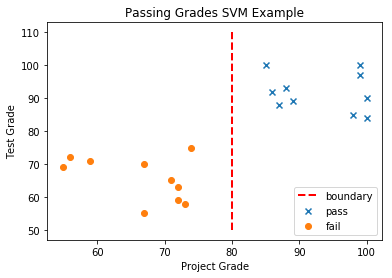

In [59]:
# some data to play with

test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']


# Graph by eyeballing - NO SVM WORK!

# Reusable function to plot our data.
def setup_plot():
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

    # We'll eyeball a pass / fail line to split the points.
    plt.plot([80, 80], [50, 110], 'r--', lw=2)

    plt.xlabel('Project Grade')
    plt.ylabel('Test Grade')

setup_plot()
plt.legend(['boundary', 'pass', 'fail'], loc=4)
plt.title('Passing Grades SVM Example')
plt.show()

In [60]:
# terrible delineation as it doesn't account for test grade at all
# use svm model now:

from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

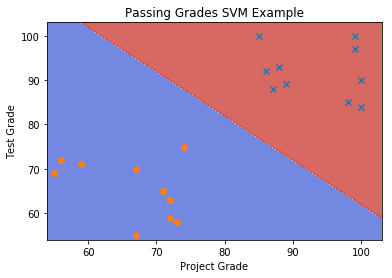

In [61]:
# Visualize our model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()

^^ You could see the optimized delineation line here.

Note that SVM's work on any number of dimensions. The SVM works in (n-1) dimensions (on 2D, delineating line, on 3D there is a 2D separating wall, etc.)

### What to do about Mixed up data?

When different kinds of data are on one side of the line, there is a "cost function" applied to the SVM - the cumulative distance of points on the wrong side of the boundary (and some more math not relevant here...).

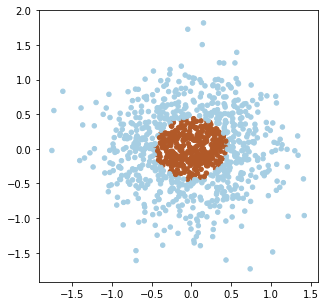

In [62]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20)

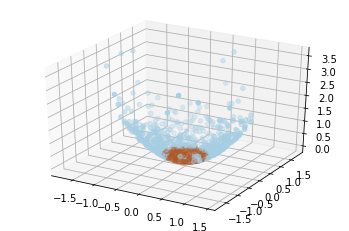

In [63]:
# The best thing here would be a circular boundary, but SVM doesn't
# work that way. Here we need to convert this to 3D, use a plane
# as a boundary, and then converting back to 2D to make that happen.

# ----------------------------------------------------------

# We're doing some 3D plotting now. 
# Tinker with it if you like but python is generally not great at this kind of thing...

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

AttributeError: 'float' object has no attribute 'ndim'

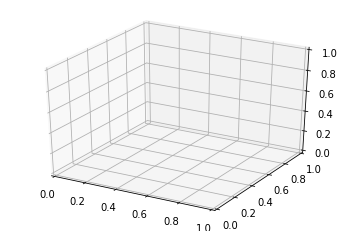

In [65]:
# separate the bottom from the rest


from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)


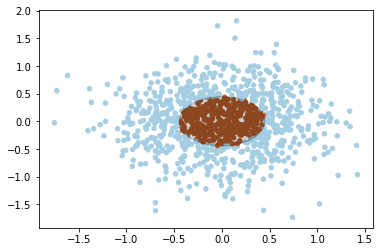

In [66]:
circle1 = plt.Circle((0, 0), np.sqrt(.2), color='k', alpha=.2)

fig, ax = plt.subplots()

ax.scatter(data['x'], data['y'], c=data['d'], s= 20)
ax.add_artist(circle1)

## Sooooo, how do we use SVMs with large feature space????

We don't want or need to transform all of our variables into a dimensions - too much computational power to do that. That's why we employ the 

#### KERNEL TRICK - What we did above (mapping 2D to 3D to find good hyperplane, then mapping back to 2D)

__Kernel:__ "A function that implicitly computes the dot product between two vectors in a higher-dimensional space _without actually transforming the vectors into that space._"


### Extensions and Alterations of SVMs

SVMs are primarily classifiers. For multiple variables, you can do a "hold one out" method, perform the one-to-one classification, then aggregate those results. It can also be done pairwise - comparing pairs to other pairs.

#### SVMs as Regressors?!

Here, the hyperplane acts as a predictor regression line and not a boundary. Two parameters to explore:
1. Epsilon - the size of the margin by which values outside of the margin will be penalized.
2. C - the penalty to be set for values outside the margin (i.e., the "sensitivity" of the model).

#### SVMs as Clusterers?
Clustering is for unsupervised learning (see other notes section). Defining boundaries is good for clustering algorithms.

In [67]:
# SVM SUPPORT VECTOR MACHINE ------- GUIDED EXAMPLE!!!!

# Loading raw data - >2000 rows and 680 columns!!!
# the columns are mainly keywords for classifier (see below)

# Dataset is epicurious recipe dataset

data = pd.read_csv('C:/Users/jafon/Documents/PythonMaterials/Data/epicurious-recipes-with-rating-and-nutrition/epi_r.csv')


### GOAL for this dataset:

Predict recipe ratings by ingredient and keyword list.

In [68]:
data.rating.describe() # target variable

# count is number of recipes, not ratings

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

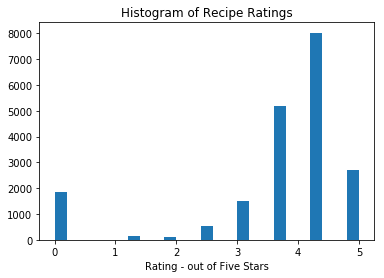

In [71]:
# note that the 25% quartile is *above* the mean - i.e.,
# very low outliers!!!

plt.hist(data.rating, bins=25)
plt.title('Histogram of Recipe Ratings')
plt.xlabel('Rating - out of Five Stars')
plt.show()

In [72]:
# before doing classification model, need to clean data (obviously)

#count nan's
null_count = data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [73]:
# with that many nulls, not gonna use those columns - not worth it

X = data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], axis=1)
Y = data.rating

In [74]:
# importing SVM model
# takes a while to run based on the large number of columns

from sklearn.svm import SVR
svr = SVR()
svr.fit(X,Y)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
# comparing the accuracy of our model to the actual outcome data
Y_pred = svr.predict(X)

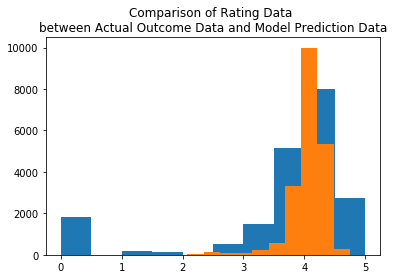

In [77]:
plt.hist(Y)
plt.hist(Y_pred)
plt.title('''Comparison of Rating Data 
between Actual Outcome Data and Model Prediction Data''')
plt.show()

In [79]:
svr.score(Y, Y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[2.5   4.375 3.75  ... 4.375 4.375 4.375].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [86]:
svr.score(X, Y_pred)

1.0

In [87]:
svr.score(X,Y) #SWEET!

0.03856570651298896

# 5. Boosting Models

__Definition:__ Model re-iterates over and over, using its results as the inputs for the next iteration, thus making it accurate more and more over time. This works for __both__ classification and regression.

Things to think about and specify for boosting models:
1. What is the core model you want to use?
2. How do you measure error (residuals for regression, cost functions (if any), confusion matricies, etc.)?
3. How does the next iteration address the error from the previous iteration?<br>
For example, you can give highly inaccurate cases high weight and accurately predicted cases low weight, or you can model the subset of data that was inaccurately predicted.
4. How to stop the model from continuing to iterate?<br>
You can stop when (a) the model reaches a certain accuracy (R2 or confusion matrix) score, (b) the set raw number of iterations to run is achieved, or (c) when the inaccuracy/weight differences are lower than a prescribed threshold.

### Gradient Boosting

__Review of the Gradient Descent Algorithm:__ The combination of parameters of a regression model and cost/loss function creates a surface, and the regression line is "fitted" by moving down the steepest downhill gradient until it reaches the lowest point on the surface.

Under this algorithm, the parameters and the loss function don't change __BUT__ under gradient boosting, they do change.

In [1]:
# GRADIENT BOOSTING ALGORITHM EXAMPLE

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd

In [4]:
# Dataset is European Union "happiness" ratings
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
df.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0


In [5]:
# partner is one value too high for binary featuring....

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set, saving 10% for testing
X_train, y_train = X[:offset], y[:offset]

# The 10% goes here
X_test, y_test = X[offset:], y[offset:]

In [6]:
# GOAL OF MODEL - does a person (datapoint) live with a partner?
'''
Since this is categorical (Yes 1, No 0), we need to define a loss 
function that is not "residuals", as that is for regression models.
We can choose between
DEVIANCE (a logistic regression loss function) or
EXPONENTIAL. We'll use deviance here.
'''

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model. THIS IS THE MODEL TO USE!
clf = ensemble.GradientBoostingClassifier(**params) # unknown number of params
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [7]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [8]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

# reminder: type 1 = false positive
#           type 2 = false negative

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


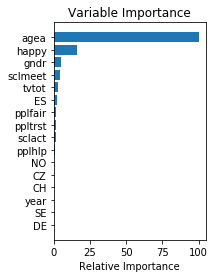

In [12]:
# ^^^^ This is how we measure classifiers. Very snazzy, huh?
# we can look at feature importance in hopes of minimizing these errors even more.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

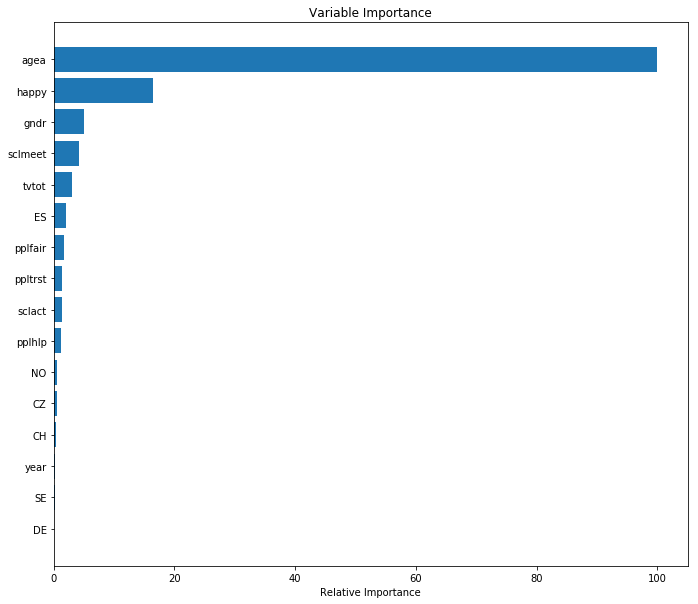

In [13]:
plt.figure(figsize=(25,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# Note - there is a gradient boosting regressor too!
from sklearn import ensemble

grboostregr = GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

# CONCLUSION: Which Supervised Learning Model to Use, and which Scoring Method to use?

This is the general process by which to figure out which ML model is best:
1. Know your Data:
    - use summary statistics (df.describe()) for correlations, central tendancies, and percentiles/ranges.
2. Visualize the data:
    - KDE/histograms for data distribution
    - boxplots for outliers
    - scatter plots for bivariate relationships
3. Clean your data:
    - Impute/drop missing data
    - Deal with outliers (tree models are less sensitive to outliers, but regression models are trash when accounting for outliers)
    - Do you need to aggregate data (group, means, etc.)?
4. Optimize your data:
    - binning/discretizing data
    - reduce dimensionality (PCA)
    - rescale variables (StandardScaler or normalization)
5. Determine what your output should be:
    - If a "class" output, classification models
    - If a "numeric" output, regression models
    
### Individual Model Uses
1. __Linear Regression__: 
    - PROS: good baseline for continuous variable problems
    - CONS: limited by linear regression assumptions (heteroskedasicity, no muli-collinearity, etc.).
    - EXAMPLES:  predicting sales, impact of BAC on coordination, time for distance traveled between locations. 
2. __Logistic Regression__: 
    - PROS: Good graphical representation of probabilities for a binary classifier
    - You don't have to worry about your features being correlated (which is a big no no for naive-bayes)
    - Can regularize your model (unlike naive bayes)
    - Can quickly update and take in new data (unlike decision trees or SVMs)
    - CONS: label out is binary, as it is a binary classifier
    - EXAMPLES: predicting customer churn, credit scoring/fraud detection, effectiveness of a marketing campaign
3. __Decision Trees__:
    - PROS: Non-parametric. Don't have to worry about outliers or whether the data is linearly separable.
    - CONS: Have to run the _entire_ tree every time you incorporate new data.
    - Outshined by random forest or gradient tree boosting.
    - They easily overfit.
    - EXAMPLES: investment decisions, customer churn, build vs. buy decisions, loan defaulters, sales lead qualifications.
4. __PCA Reduction__:
    - PROS: Designed to handle wide range of features that are highly co-correlated and thus can overfit in other models.
    - Lowers dimensionality
    - CONS: Not really used beyond this specific situation.
5. __Support Vector Machines/SVMs__:
    - PROS:Good for pattern recognition and binary classification problems.
    - CONS: Blackbox. High accuracy means prone to overfitting.
    - EXAMPLES: Detecting persons with diseases (1/0 diabetes), hand-written character recognition, stock market price prediction.
6. __Naive Bayes Classifier__:
    - PROS: Easy to build and use, making it great for big datasets (i.e., when computational overhead is a factor to consider). This also means you don't need as much training data.
    - Despite simplicity, it's been known to outperform more sophisticated classifiers.
    - Has three classifying styles that can cover a lot: _Bernoulli_: For binary classifications only (1 for found, 0 for absent); _Gaussian_: Works for finding a "cut-off" point for continuously normally distributed data, like height in persons for dunking and non-dunking abilities (this is similar to SVM); and _Multinomial_: Determining frequencies/counts for non-binary discrete data (movie ratings, word text counts).
    - CONS: It doesn't learn interactions between features - just pukes out a 0 or 1.
    - EXAMPLES: Sentiment analysis/text classification, recommendation systems (amazon, netflix), face recognition, spam/ham filtering.
7. __Random Forest__:
    - PROS: Good ability to determine feature importance, even with datasets that have tons of features. Good if you have high variance in the data.
    - CONS: Depending on parameterization, will take a _long_ time to load. Like the con for decision trees, you need to iterate the _whole_ model over again if new data comes into play.
    - EXAMPLES: predicting high risk patients, loan defaulters, or manufacturing defects.   
8. __K-Nearest Neighbors__:
    - PROS: Simple and effective. Can act as both classifier or regressor.
    - CONS: Performs a calculation against the entirety of the data, which is computationally expensive. It also breaks down at higher dimensions.
9. __AdaBoost('Adaptive Boosting')/EnsembleTrees__:
    - PROS: Generates accuracy from results of previous iteration (essentially the definition of boosting)
    - CONS: Being that the following iteration is based off the results of the previous one, it's important to correct mistakes/clean the data properly and remove outliers.
10. __Linear Discriminant Analysis(LDA)__:
    - A function that finds a regression line with a slope that crosses through the data in the best way that separates them into classified categories. [See here for a description.](https://mlalgorithm.files.wordpress.com/2016/06/lda.jpg?w=700)
    

# Some Potential Errors:

1. __ValueError:__ Setting an array element with a sequence
 - _Answer_: There is a problem with your model shape. Sklearn models __MUST__ have a 2D setup, or they will not work. So: (1) the shape of one of the columns is off (which can be fixed by Y.reshape(-1,1) or X.ravel() (ravel() and reshape(-1) essentially do the same thing), or (2) the length of the columns is mismatched (rows of X do not match with rows of Y)